# Autoencoder

Autoencoders are a great contribution to `Unsupervised Learning`; the ability to learn without label data.  
Reference: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

/home/unknown/anaconda2/envs/kr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Data Preparation
We are using MNIST digits

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

### We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Let's train our `Autoencoder` for 50 epochs

In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.3596 - val_loss: 0.2710
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2636 - val_loss: 0.2525
Epoch 3/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2421 - val_loss: 0.2302
Epoch 4/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2226 - val_loss: 0.2131
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2079 - val_loss: 0.2003
Epoch 6/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1964 - val_loss: 0.1899
Epoch 7/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1871 - val_loss: 0.1816
Epoch 8/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1796 - val_loss: 0.1748
Epoch 9/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1734 - val_loss: 0.1692
Epoch

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

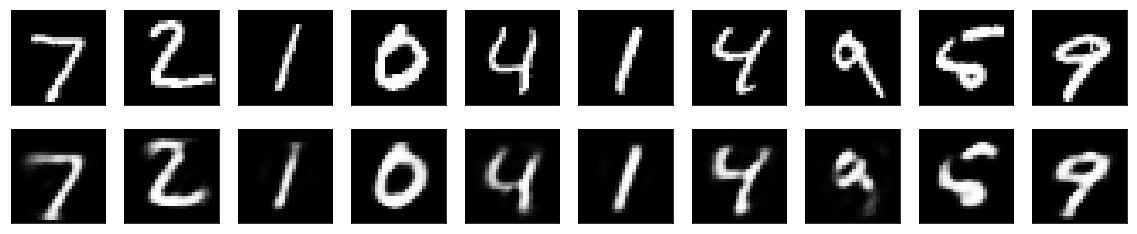

In [9]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Top row: Original digits
### Bottom row: Regenerated digits